# Read statistics about snapshots and plot linear parameters

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120

### Specify suite of simulations to use and read metadata

In [2]:
basedir='/Users/font/CosmoData/test_sim_emulator/test_small/'
cube_json=basedir+'/latin_hypercube.json'
with open(cube_json) as json_file:  
    cube_data = json.load(json_file)
nsamples=cube_data['nsamples']
print('# samples =',nsamples)
# label identifying the particular skewer extraction (number of skewers per side and cell width in Mpc)
skewer_label='Ns10_wM0.2'

# samples = 2


### Get information from all models simulated (simulation pairs)

In [3]:
snap_arxiv = []
for sample in range(nsamples):
    # store parameters for simulation pair / model
    sim_params = cube_data['samples']['%d'%sample]
    print(sample,'sim params',sim_params)
    model_dict ={'sample':sample,'sim_param':sim_params}
    # read number of snapshots 
    pair_dir=basedir+'/sim_pair_%d'%sample
    pair_json=pair_dir+'/parameter.json'
    with open(pair_json) as json_file:  
        pair_data = json.load(json_file)
    #print(sample,'pair data',pair_data)
    zs=pair_data['zs']
    Nz=len(zs)
    for snap in range(Nz):        
        # make sure that we actually extracted skewers for this snapshot (z < zmax)
        plus_p1d_json=pair_dir+'/sim_plus/p1d_{}_{}.json'.format(snap,skewer_label)
        if not os.path.isfile(plus_p1d_json):
            print('do not have this snapshot',snap)
            continue
            
        # get linear power parameters describing snapshot
        linP = pair_data['linP_zs'][snap]
        snap_dict = {'model':model_dict,'snap':snap,'z':zs[snap],'linP':linP}  
        snap_arxiv.append(snap_dict)

0 sim params [0.97, 0.4, 0.875]
1 sim params [0.96, 0.3, 1.625]


In [4]:
Ntot=len(snap_arxiv)
# linear parameters at z_star=3
Delta2_star=np.array([snap_arxiv[i]['model']['sim_param'][1] for i in range(Ntot)])
Om_star=np.array([snap_arxiv[i]['model']['sim_param'][1] for i in range(Ntot)])
# linear parameters at the snapshot
Delta2_p=np.array([snap_arxiv[i]['linP']['Delta2_p'] for i in range(Ntot)])
n_p=np.array([snap_arxiv[i]['linP']['n_p'] for i in range(Ntot)])
alpha_p=np.array([snap_arxiv[i]['linP']['alpha_p'] for i in range(Ntot)])
f=np.array([snap_arxiv[i]['linP']['f'] for i in range(Ntot)])

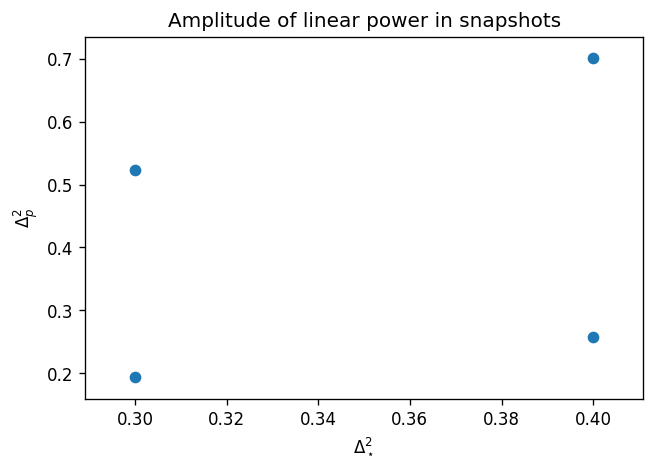

In [5]:
plt.scatter(Delta2_star,Delta2_p)
plt.xlabel(r'$\Delta_\star^2$')
plt.ylabel(r'$\Delta_p^2$')
plt.title('Amplitude of linear power in snapshots')

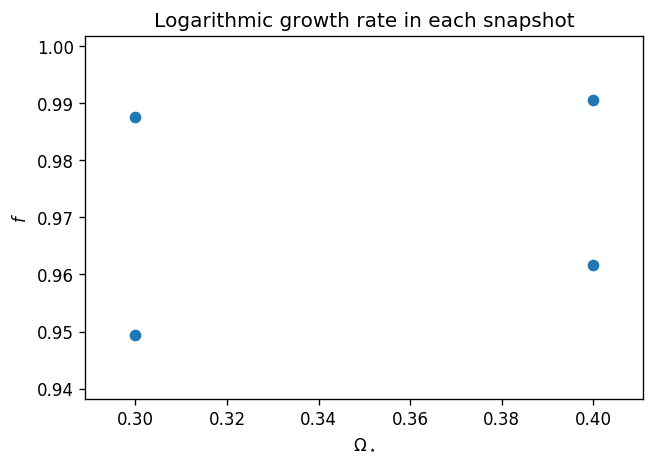

In [6]:
plt.scatter(Om_star,f)
plt.xlabel(r'$\Omega_\star$')
plt.ylabel(r'$f$')
plt.title('Logarithmic growth rate in each snapshot')

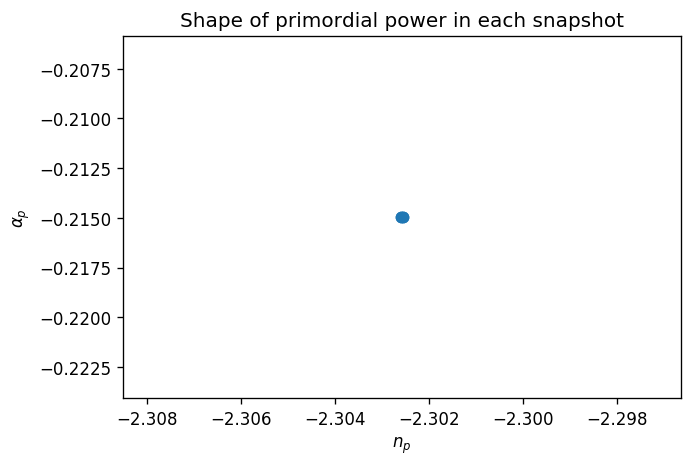

In [7]:
plt.scatter(n_p,alpha_p)
plt.xlabel(r'$n_p$')
plt.ylabel(r'$\alpha_p$')
plt.title('Shape of primordial power in each snapshot')